<a href="https://colab.research.google.com/github/Andres931720/Deberes/blob/main/Examen_C1_VINUEZA_ANDR%C3%8BS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### EXAMEN - Convocatoria 1 - Programación
Utilizar el conjunto de datos "dataset_exam.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

#### 1) Partición de datos externa (1 punto)
Realizar una partición externa de tipo hold-out seleccionando un 20% de los datos para test (fijar una semilla en 42).
Comprobad si los datos, tanto de train como de test, están más o menos balanceados.

In [ ]:
# Cargamos los datos
import numpy as np
data = np.load('dataset_exam.npy', allow_pickle=True)


In [ ]:
data[0]

array([0.        , 4.        , 1.        , 4.        , 2.        ,
       9.04481012, 8.2603626 , 7.37490176, 0.        ])

In [ ]:
# Mostrar características de la tabla de datos.
print("Tabla de datos: %d instancias y %d atributos" % (data.data.shape[0], data.data.shape[1]))



Tabla de datos: 492 instancias y 9 atributos


In [ ]:

clase= data[:, -1]
x = data[:,:-1]

In [ ]:
# Cuantificamos el número de instancias que contiene el dataset por clase
valores, ocurrencias = np.unique(clase, return_counts=True)
print(valores, ocurrencias)

[0. 1.] [246 246]


In [ ]:
print("Valores de la clase:", set(clase))

Valores de la clase: {0.0, 1.0}


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Validación: hold-out split 80-20%. # Partición interna
X_train, X_val, y_train, y_val = train_test_split(x, clase, test_size=0.2, random_state=42)
valores_train, ocur_train = np.unique(y_train, return_counts=True)

valores_val, ocur_val = np.unique(y_val, return_counts=True)

print('Validation:    ', ' clases:', valores_val, '  ocurrencias:', ocur_val)
print(f'Clase entrenamiento {valores_train} ocurrencias {ocur_train} porcentaje {  round(100*ocur_train[0]/(sum(ocur_train) ),2 )  }')
print(f'Clase validacion {valores_val} ocurrencias {ocur_val} porcentaje {  round(100*ocur_val[0]/(sum(ocur_val) ),2 )  }')

Validation:      clases: [0. 1.]   ocurrencias: [51 48]
Clase entrenamiento [0. 1.] ocurrencias [195 198] porcentaje 49.62
Clase validacion [0. 1.] ocurrencias [51 48] porcentaje 51.52


Al tener valores cercanos al 50% podenos afirmar que está balanceado

#### 2) Estandarización de los datos de train y test (1 punto)
Utilizar el método StandardScaler().

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Estandarizar las características de entrenamiento y de test
standardizer = StandardScaler()
X_train_s = standardizer.fit_transform(X_train)
X_test_s = standardizer.transform(X_val)

#### 3) Selección de atributos en train y test (1 punto)
Aplicar el método de mutual information para clasificación seleccionando un percentile=90. (Recordad la función "SelectPercentile")

In [ ]:
#Importamos librerias
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif



In [ ]:
#Se selecciona el percentil=90

sp= SelectPercentile(mutual_info_classif, percentile = 90)
sp.fit(X_train_s,y_train)

SelectPercentile(percentile=90,
                 score_func=<function mutual_info_classif at 0x0000024249C540D0>)

In [ ]:
X_train_selected = sp.transform(X_train)
X_test_selected = sp.transform(X_val)

#### 4) Comparación de modelos de clasificación mediante validación cruzada (3 puntos)
Instrucciones:

- Aplicar una validación cruzada interna de K=5 bolsas para optimizar y comparar la capacidad predictiva de los siguientes modelos: Regresión Logística y Support Vector Machine.
- La optimización de hiperparámetros debe realizarse de manera automática. (Recordad la función "GridSearchCV").
- La comparación debe realizarse únicamente en términos de exactitud proporcionando resultados de media +- desviación estándar.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# --- Grid para Regresión Logística ---
param_grid_log = {
    'C': [0.01, 0.1, 1, 10]
}

log_model = LogisticRegression(max_iter=1000)

# --- Grid para SVM ---
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svm_model = SVC(probability=True)


grid_log = GridSearchCV(log_model, param_grid_log, cv=cv, scoring='accuracy', n_jobs=-1)
grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=cv, scoring='accuracy', n_jobs=-1)

# Entrenar con los datos seleccionados
grid_log.fit(X_train_selected, y_train)
grid_svm.fit(X_train_selected, y_train)

#Obtener resultado
mean_log = grid_log.cv_results_['mean_test_score'].mean()
std_log = grid_log.cv_results_['std_test_score'].mean()

mean_svm = grid_svm.cv_results_['mean_test_score'].mean()
std_svm = grid_svm.cv_results_['std_test_score'].mean()


print(" Regresión Logística:")
print("Mejores hiperparámetros:", grid_log.best_params_)
print("Accuracy media: %.4f +/- %.4f" % (mean_log, std_log))

print("\n SVM:")
print("Mejores hiperparámetros:", grid_svm.best_params_)
print("Accuracy media: %.4f +/- %.4f" % (mean_svm, std_svm))


 Regresión Logística:
Mejores hiperparámetros: {'C': 0.01}
Accuracy media: 0.6727 +/- 0.0611

 SVM:
Mejores hiperparámetros: {'C': 10, 'kernel': 'rbf'}
Accuracy media: 0.7003 +/- 0.0683


#### 5) Evaluación de los modelos sobre el conjunto de test (2.5 puntos)
- Entrenar los modelos anteriores utilizando todos los datos de entrenamiento.
- Evaluar su rendimiento sobre el conjunto de test mostrando una tabla de resultados tal que:
 * Las filas serán: Precisión, Sensibilidad, F-score, Exactitud y AUC
 * Las columnas serán: LOGR y SVM

In [ ]:
#Se entrena modelo LOG
mejor_log = grid_log.best_estimator_
mejor_log.fit(X_train_selected, y_train)

LogisticRegression(C=0.01, max_iter=1000)

In [ ]:
y_pred_log = mejor_log.predict(X_test_selected)
y_prob_log = mejor_log.predict_proba(X_test_selected)[:, 1]

In [ ]:
mejor_svm = grid_svm.best_estimator_

mejor_svm.fit(X_train_selected, y_train)

SVC(C=10, probability=True)

In [ ]:

y_pred_svm = mejor_svm.predict(X_test_selected)

y_prob_svm = mejor_svm.decision_function(X_test_selected)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:
import pandas as pd

In [ ]:
# Crear un diccionario con las métricas para ambos modelos
raesultados = {
    "LOGR": {
        "Precisión": precision_score(y_val, y_pred_log),
        "Sensibilidad": recall_score(y_val, y_pred_log),
        "F1-Score": f1_score(y_val, y_pred_log),
        "Exactitud": accuracy_score(y_val, y_pred_log),
        "AUC": roc_auc_score(y_val, y_prob_log)
    },
    "SVM": {
        "Precisión": precision_score(y_val, y_pred_svm),
        "Sensibilidad": recall_score(y_val, y_pred_svm),
        "F1-Score": f1_score(y_val, y_pred_svm),
        "Exactitud": accuracy_score(y_val, y_pred_svm),
        "AUC": roc_auc_score(y_val, y_prob_svm)
    }
}
print(pd.DataFrame(resultados))

                  LOGR       SVM
Precisión     0.614035  0.883721
Sensibilidad  0.729167  0.791667
F1-Score      0.666667  0.835165
Exactitud     0.646465  0.848485
AUC           0.734886  0.906863


#### 6) Visualización de resultados (1 punto)
- Mostrar la matriz de confusión
- Mostrar en una única figura la comparación de las curvas ROC obtenidas por cada modelo. (Recordad que SVM requiere un parámetro específico en su llamada para poder calcular la curva ROC).

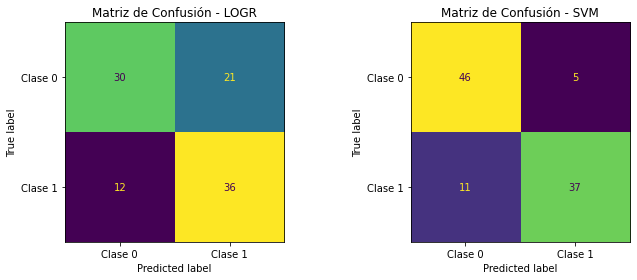

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matrices de confusión
cm_log = confusion_matrix(y_val, y_pred_log)
cm_svm = confusion_matrix(y_val, y_pred_svm)

# Mostrar ambas matrices una al lado de otra
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

ConfusionMatrixDisplay(cm_log, display_labels=["Clase 0", "Clase 1"]).plot(ax=axes[0], colorbar=False)
axes[0].set_title("Matriz de Confusión - LOGR")

ConfusionMatrixDisplay(cm_svm, display_labels=["Clase 0", "Clase 1"]).plot(ax=axes[1], colorbar=False)
axes[1].set_title("Matriz de Confusión - SVM")

plt.tight_layout()
plt.show()


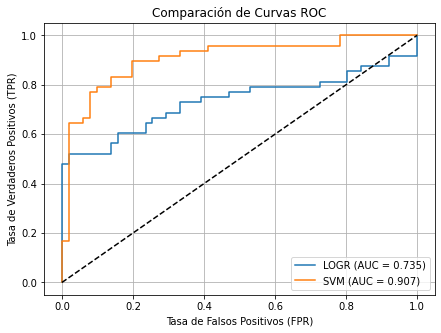

In [ ]:

from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# Calcular fpr, tpr, auc para LOGR
fpr_log, tpr_log, _ = metrics.roc_curve(y_val, y_prob_log)
auc_log = metrics.roc_auc_score(y_val, y_prob_log)

# Calcular fpr, tpr, auc para SVM
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_val, y_prob_svm)
auc_svm = metrics.roc_auc_score(y_val, y_prob_svm)

# Graficar ambas curvas en una sola figura
plt.figure(figsize=(7,5))
plt.plot(fpr_log, tpr_log, label=f"LOGR (AUC = {auc_log:.3f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.3f})")

# Línea diagonal (clasificador aleatorio)
plt.plot([0,1],[0,1],'k--')

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparación de Curvas ROC')
plt.legend()
plt.grid()
plt.show()


#### 7) Interpretación de resultados (0.5 puntos)
* Justifica brevemente cuál de los dos modelos utilizarías para ponerlo en producción

- Precisión: El modelo SVM tiene menos falsos positivos

- Sensibilidad (Recall): Similares pero SVM tiene un valor ligeramente más alto

- F1-Score: SVM tiene mejor desempeño global

- Accuracy: SVM tiene un valor más alto con el 85%, es decir precide mejor que LOGR

- AUC: SVM tiene poder discriminativo mejor


Finalmente, con la curva ROC notamos la línea SVM (Naranja) sobre la LOGR (AZUL) por todas las métricas podemos notar mejor comportamiento del modelo SVM. -


